In [55]:
import os
def CreateFolder(folder):
    if not os.path.exists(folder):
        os.mkdir(folder)



In [126]:
import csv
import matplotlib.pylab as plt
def GetCSV(filename,objectnames):
    dictcsv = {}
    prevframe = 0
    # objectnames = []
    numobjects_perframe = []
    
    with open(filename, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            if row["framecounter"]!=prevframe and prevframe==0: #first row
                prevframe = row["framecounter"]
                framecounter = 1
                dictcsv[prevframe] = {}
                dictcsv[prevframe]["name"] = []
                dictcsv[prevframe]["name"].append(row["name"])
                if row["name"] not in objectnames:
                    objectnames.append(row["name"])
                    
                framecounter = framecounter+1
                line_count += 1
                continue
            elif row["framecounter"]!=prevframe and prevframe!=0: #first row
                dictcsv[prevframe]["numframes"] = framecounter-1
                numobjects_perframe.append(framecounter-1)
                prevframe = row["framecounter"]
                framecounter = 1
                dictcsv[prevframe] = {}
                dictcsv[prevframe]["name"] = []
                dictcsv[prevframe]["name"].append(row["name"])
                if row["name"] not in objectnames:
                    objectnames.append(row["name"])
                framecounter = framecounter+1
                line_count += 1
                continue
            dictcsv[prevframe]["name"].append(row["name"])
            if row["name"] not in objectnames:
                    objectnames.append(row["name"])
            framecounter = framecounter+1
            line_count += 1
        dictcsv[prevframe]["numframes"] = framecounter-1
    return objectnames,dictcsv,numobjects_perframe



Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
Column names are framecounter, timestamp, name, boundingBox, localToWorldMatrix
19027


Text(0, 0.5, 'number of frames')

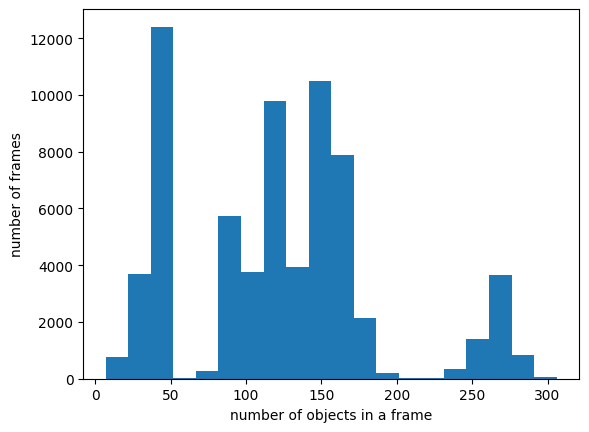

In [127]:
root = '../DataCollected/BeatSaber'
csvfolders = ['P0-VRLOG-1673565928','P1-VRLOG-1677549536','P2-VRLOG-1677550250','P3-VRLOG-1677551145','P4-VRLOG-1677559341','P5-VRLOG-1677568635','P7-VRLOG-1677641052','P8-VRLOG-1677657908','P10(2)-VRLOG-1677650659','P11-VRLOG-1677664186']
total_numobjects_perframe = []
dictcsv_all = {}
objectnames = []
for folder in csvfolders:
    csvfile = root+'/'+folder+'/object.csv'
    videoimagespath =  root+'/'+folder
    objectnames,dictcsv,numobjects_perframe = GetCSV(csvfile,objectnames)
    total_numobjects_perframe = total_numobjects_perframe+numobjects_perframe
    dictcsv_all[folder] = dictcsv
# print((objectnames))
print(len(dictcsv))
# print(numobjects_perframe.index(270))
# print(dictcsv)
# print((numobjects_perframe))
plt.hist(total_numobjects_perframe,20)
plt.xlabel("number of objects in a frame")
plt.ylabel('number of frames')
# plt.title(videoimagespath.split('/')[-1])

In [128]:
print(objectnames)

['VRCursor(Clone)', 'OnlyDepth', 'VRLaserPointer(Clone)', 'GrabPassTexture1', 'LightManager', 'SceneCameraBloomPrePass', 'Glowing', 'Normal', 'BloomSkyboxQuad', 'BasicMenuGround', 'DustPS', 'BigSmokePS', 'Feet', 'Version', 'MenuShockwave', 'SaberHandle', 'SaberBlade', 'SaberGlowingEdges', 'StencilWrite', 'BombLW', 'FadeQuad', 'Sparkle', 'SaberBurnMarkSparkle', 'BombHD', 'FailSprite', 'NoteArrow', 'ObstacleCore', 'NoteCube', 'ObstacleFrame', 'DepthWrite', 'NoteDebrisMesh', 'Mesh', 'Hand', 'Head', 'Clothes', 'NoteArrowGlow', 'HologramRays', 'HeadTop', 'SpriteV', 'Eyes', 'TNeon', 'BNeon', 'Note (9)', 'Note (4)', 'Note (8)', 'Note', 'Note (16)', 'Note (14)', 'Note (13)', 'ENeon', 'ANeon', 'SaberNeon', 'SparksDown', 'SparksUp', 'GlowLines (1)', 'GlowLines', 'Shadow', 'Shadow (1)', 'LogoE', 'SaberLogo', 'BatLogo', 'Note (15)', 'Note (3)', 'Note (2)', 'Ring', 'BoxLight', 'Construction', 'CombinedMesh', 'TrackMirror', 'BottomBoxLight', 'TopBoxLight', 'Spectrogram0', 'Spectrogram1', 'ShockWave'

In [122]:
fps = 15 
numobjects_borders = [100,150]
numobjclassnames = ['low','med','high']
outputvideospath = root+'/videos'
CreateFolder(outputvideospath)
outputlow = outputvideospath+'/'+numobjclassnames[0]
CreateFolder(outputlow)
outputmed = outputvideospath+'/'+numobjclassnames[1]
CreateFolder(outputmed)
outputhigh = outputvideospath+'/'+numobjclassnames[2]
CreateFolder(outputhigh)
def GetClass(numobjects):
    if numobjects<=numobjects_borders[0]:
        return numobjclassnames[0]
    elif numobjects>numobjects_borders[0] and numobjects<=numobjects_borders[1]:
        return numobjclassnames[1]
    else:
        return numobjclassnames[2]
    
def MostFrequent(List):
    return max(set(List), key = List.count)

def GetDestfolder(targetclass):
    if targetclass == numobjclassnames[0]:
        return outputlow
    elif targetclass == numobjclassnames[1]:
        return outputmed
    else:
        return outputhigh
    

In [123]:
def WriteVideo(frames,videoimagespath,destvideofile):
    img = cv2.imread(videoimagespath+'/s'+frames[0]+'.jpg')
    height, width, layers = img.shape
    size = (int(width/2),height)
   
    # out = cv2.VideoWriter(destvideofile,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    out = cv2.VideoWriter(destvideofile,cv2.VideoWriter_fourcc(*'MP4V'), fps, size)
    
    
    for image in frames:
        filename = videoimagespath+'/s'+image+'.jpg'
        if not os.path.exists(filename): continue

        img = cv2.imread(filename)
        img_cropped = img[:size[1],:size[0]]
        # img_resized = cv2.resize(img_cropped, (size2[1],size2[0]))
        # plt.imshow(img_cropped)
        # out.write(img[:size[1],:size[0]])
        out.write(img_cropped)

    out.release()
    
    
    

In [124]:
import cv2
import numpy as np
import glob

filecount = {}
filecount[numobjclassnames[0]] = 0
filecount[numobjclassnames[1]] = 0
filecount[numobjclassnames[2]] = 0
actualfilecount = {}
actualfilecount[numobjclassnames[0]] = 0
actualfilecount[numobjclassnames[1]] = 0
actualfilecount[numobjclassnames[2]] = 0
for folder in csvfolders:
    csvfile = root+'/'+folder+'/object.csv'
    sourceimagespath =  root+'/'+folder
    
    dictcsv = dictcsv_all[folder]
    # print(dictcsv)
    framenumbers = dictcsv.keys()
    
    frames = []
    classlist = []
    cnt = 0
    for framenum in framenumbers:
        # print(dictcsv[framenum]['numframes'])
        numobj = dictcsv[framenum]['numframes']
        classname = GetClass(numobj)
        if len(frames)<fps:
            frames.append(framenum)
            classlist.append(classname)
        else:
            targetclass = MostFrequent(classlist)
            # print(targetclass)
            filecount[targetclass] = filecount[targetclass]+1
            destfolder = GetDestfolder(targetclass)
            destvideofile = destfolder+'/'+str(cnt)+'.mp4'
            WriteVideo(frames,sourceimagespath,destvideofile)
            if os.path.exists(destvideofile):
                actualfilecount[targetclass] = actualfilecount[targetclass]+1
            frames = []
            classlist = []
            frames.append(framenum)
            classlist.append(classname)
            cnt = cnt+1
print(filecount)
print(actualfilecount)


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
Open

{'low': 1543, 'med': 1415, 'high': 1530}
{'low': 1543, 'med': 1415, 'high': 1530}


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
